# Introduction to blockchain HW 1


1.1	1.2	1.3	1.4	2.1	2.2	2.3	2.4	2.5	3.1	3.2	3.3	3.4	3.5	4.1	4.2	4.3	4.4	4.5	4.6	SUM	LATE COEFFICIENT	TOTAL

2	3	2	2(1) 2	2(1)	2	1	2	 10	 1	 1	0(1) 1	 3	 2	 2	 2	 4	 2	46	      1	         46

## Problem 1 (10 points) Seminar 3, lecture 4

Assume that at the end of the term an instructor uses an RSA Public Key Cryptosystem to sign the grades sent to students and to the Education Office. He signs each grade with his private key and transmits both the grade and the signature in a secure manner encrypted with a public key. After you decrypt the message you use his public key to decipher the signature and verify the grade. Assume the cryptosystem has the following features: n=55, e=33 and that the grading system features integer grades from 0 to 10. You have received the grade-signature pairs 8||13 and 6||41

1.Verify that the grades you received are indeed originating from the instructor showing just intermediate results of your calculation (2 points)

Firstly, we should make prime factorization of n = 55. => p = 11, q = 5

Secondly, calculate Euler’s function  $ \phi(n) =  (p-1) (q-1) = 40$

As we know e = 33, then $ d = e^{-1}mod$ $  \phi(n) = 17$

Message m = 13  
Decryption $ c = m^e mod$ n = $ 13^{33} mod$  55 = 8

Also, decryption for m = 41, $ c = m^e mod$ n = $ 41^{33} mod$  55 = 6

In [1]:
decryption_13 = 13**33%55
decryption_41 = 41**33%55
print(decryption_13,decryption_41)

8 6


We verified our writting results.

2.Given the information above only can you fabricate the instructors’ signature for another grade? If yes, for which grade and how? (3 points)

Yes, as we think that everybody know **n = 55** and **e = 33** then malefactor can fabricate the instructors’ signature for another grade with help of brute force.
He can suggest that grade will be from 0 to 10.

In [4]:
print('signature   ','mark')
for i in range(0,55):
    decryption = i**33%55
    if 0<= decryption <= 10:
        print('   ',i,'   ||  ',decryption)

signature    mark
    0    ||   0
    1    ||   1
    4    ||   9
    7    ||   2
    10    ||   10
    13    ||   8
    17    ||   7
    25    ||   5
    41    ||   6
    49    ||   4
    53    ||   3


Also he can find all techer signatures from d.

Make factorization of n

In [5]:
n = 55
e = 33

In [6]:
def primfacs(n): #Integer Factorization
    i = 2
    primfac = []
    while i * i <= n:
        while n % i == 0:
            primfac.append(i)
            n = n / i
        i = i + 1
    if n > 1:
        primfac.append(n)
    return primfac

In [7]:
p,q = primfacs(n)

now he can find **d**

In [8]:
def extended_gcd(a, b):
    x = 0
    y = 1
    lx = 1
    ly = 0
    oa = a
    ob = b
    while b != 0:
        q = a // b
        (a, b)  = (b, a % b)
        (x, lx) = ((lx - (q * x)),x)
        (y, ly) = ((ly - (q * y)),y)
    if (lx < 0): lx += ob
    if (ly < 0): ly += oa
    return lx
def secret_exponent(e, p, q): 
    Eul_func = (p - 1) * (q - 1)
    return extended_gcd(e, Eul_func)

print(secret_exponent(33, p, q))

17.0


In [9]:
print('mark   ','signature')
for i in range(0,11):
    decryption=(i**17)%55
    print(' ',i,'  ||   ',decryption)

mark    signature
  0   ||    0
  1   ||    1
  2   ||    7
  3   ||    53
  4   ||    49
  5   ||    25
  6   ||    41
  7   ||    17
  8   ||    13
  9   ||    4
  10   ||    10


Also, we can see that malefactor can send mark = 10 with same signature 10( also 0 || 0 ; 1 ||1) and will take the best grade (the worst grade)
That is why mark shouldn't be equal signature.

3.What would you advise the instructor to do so as to prevent such fabrication? (2 points)

Increase number of marks and ,of course, **n** because it will complicate brute forse.

4.Discuss what can go wrong in case the instructor sends a grade secretly by first enciphering it with a student’s public key, the signing it with his private key. Provide an example (3 points) **2**

Instructor can make mistake if he will try to signature encryption message :
$$ S_A(E(m)) = S_A(c) = (m^e)^d mod(n) = m^{ed} mod(n) = m $$

In this case, mark-signature pair will be rigth oinly for three marks (0, 1, 10)

## Problem 2 (10 points) Seminar 3

El-Gamal is videly used cryptographic standart. In this task you will implement El-Gamal encryption scheme using Python

1.Implement function for generating keys. The function must generate big random prime number (problem of generating big prime numbers was discussed during seminar after lecture 3). (2 points)

In [10]:
# Python implementation of Fermat's primality test to generate prime numbers of any bit length.
import random
from random import randint

def is_prime(num, test_count):
    if num == 1:
        return False
    if test_count >= num:
        test_count = num - 1
    for x in range(test_count):
        val = randint(1, num - 1)
        if pow(val, num-1, num) != 1:
            return False
    return True

def generate_big_prime(n, test_count=1000):
    found_prime = False
    while not found_prime:
        p = randint(2**(n-1), 2**n)
        if is_prime(p, test_count):
            return p

In [11]:
n = 20
random_prime = generate_big_prime(n)
print(random_prime)
# Generates a random prime number of length n bits

826663


2.Implement functions that realize the encryption and decryption functions. (2 points)

In [12]:
def gcd(a,b):
    while a != b:
        if a > b:
            a = a - b
        else:
            b = b - a
    return a

def primitive_root(modulo):
    roots = []
    required_set = set(num for num in range (1, modulo) if gcd(num, modulo) == 1)
    for g in range(1, modulo):
        actual_set = set(pow(g, powers) % modulo for powers in range (1, modulo))
        if required_set == actual_set:
            return g

In [13]:
def gen_keys(n):
    p = generate_big_prime(n)
    g = primitive_root(p)
    x = random.randint(1,p-1)
    y = pow(g,x,p)
    return x, y

In [14]:
def gen_keys_with_p(p):
    g = primitive_root(p)
    x = random.randint(1,p-1)
    y = pow(g,x,p)
    return x, y

In [15]:
def encrypt(M,p,g, y):
    k = random.randint(1,p-1)
    (a,b) = (pow(g,k,p), pow(y,k)*M%p)
    return (a,b)

In [16]:
def decrypt(a,b, x, p):
    M = (b*pow(a,p-1-x,p)%p)
    return M

3.Test your functions on random values and show that your realization works correctly (1 point)

In [27]:
#as in wiki
x,y = gen_keys_with_p(11)
print( x, y)

8 3


In [37]:
a,b = encrypt(M=5,g=2,p=11,y=3)
print(a,b)

6 9


In [38]:
M = decrypt(a,b,p=11,x=8)
M

5

4.Implement functions that realize creation and verification of digital signature (2 points) **1**

In [39]:
def eea(a,b):
    if b==0:return (1,0)
    (q,r) = (a//b,a%b)
    (s,t) = eea(b,r)
    return (t, s-(q*t) )

def find_inverse(x,y):
    inv = eea(x,y)[0]
    if inv < 1: inv += y #we only want positive values
    return inv

In [40]:
# gabage
p = 23
g = 5#primitive_root(p)
x = 7 #random.randint(2,p-1)
y = pow(g,x,p)
#---------------------------------------------------------------
m = 3 #5*4#x*r + (k*s) % (p-1) hash_simple(6)
k = 5 #random.randint(2,p-1)
r = pow(g,k,p)

#s = find_inverse((m-x*r)*1//k,p-1)
s = ((m-x*r)*find_inverse(k,p-1))%(p-1)
print(r,s)
#--------------------------------------------------------------
print((y**r*r**s)%p == pow(g,m,p))

20 21
True


In [45]:
def hash_simple(M): # like wiki
    return M//2

In [41]:
def Mes_Signature_with_simple_hash(M,p,g,x):
    m = hash_simple(M)
    k = random.randint(2,p-1)
    r = pow(g,k,p)
    s = ((m-x*r)*find_inverse(k,p-1))%(p-1)
    return (r,s)

In [42]:
def Mes_Signature(M,p,g,x):
    m = hash(M)
    print(m)
    k = random.randint(2,p-1)
    r = pow(g,k,p)
    s = ((m-x*r)*find_inverse(k,p-1))%(p-1)
    return (r,s)

In [43]:
def sig_verification(p,g,y, r,s, m):
    if( (0 < r < p) & (0 < s < (p-1)) ):
        op1 = (y**r*r**s)%p
        op2 =  pow(g,m,p)
       # print(op1,op2)
        return op1 == op2
    else:
        return False

5.Test your functions on random values and show that your algorithm works correctly (1 point)

In [78]:
r,s = Mes_Signature_with_simple_hash(6,23,g,x)
r,s

(20, 21)

In [79]:
sig_verification(23,g,y,r,s,3)

True

## Problem 3 (15 points) Seminar 2

1.Implement SHA256 (https://en.wikipedia.org/wiki/SHA-2) hashing algorithm using the pseudo-code below. Note the great increase in mixing between bits of the w[16..63] words compared to SHA-1 (10 points)

In [80]:
def sha2(data):
    bytes = ""

    #Initialize hash values:
    #(first 32 bits of the fractional parts of the square roots of the first 8 primes 2..19):
    h0 = 0x6a09e667
    h1 = 0xbb67ae85
    h2 = 0x3c6ef372
    h3 = 0xa54ff53a
    h4 = 0x510e527f
    h5 = 0x9b05688c
    h6 = 0x1f83d9ab
    h7 = 0x5be0cd19

    #Initialize array of round constants:
    #(first 32 bits of the fractional parts of the cube roots of the first 64 primes 2..311):
    k = [
        0x428a2f98, 0x71374491, 0xb5c0fbcf, 0xe9b5dba5, 0x3956c25b, 0x59f111f1, 0x923f82a4, 0xab1c5ed5,
        0xd807aa98, 0x12835b01, 0x243185be, 0x550c7dc3, 0x72be5d74, 0x80deb1fe, 0x9bdc06a7, 0xc19bf174,
        0xe49b69c1, 0xefbe4786, 0x0fc19dc6, 0x240ca1cc, 0x2de92c6f, 0x4a7484aa, 0x5cb0a9dc, 0x76f988da,
        0x983e5152, 0xa831c66d, 0xb00327c8, 0xbf597fc7, 0xc6e00bf3, 0xd5a79147, 0x06ca6351, 0x14292967,
        0x27b70a85, 0x2e1b2138, 0x4d2c6dfc, 0x53380d13, 0x650a7354, 0x766a0abb, 0x81c2c92e, 0x92722c85,
        0xa2bfe8a1, 0xa81a664b, 0xc24b8b70, 0xc76c51a3, 0xd192e819, 0xd6990624, 0xf40e3585, 0x106aa070,
        0x19a4c116, 0x1e376c08, 0x2748774c, 0x34b0bcb5, 0x391c0cb3, 0x4ed8aa4a, 0x5b9cca4f, 0x682e6ff3,
        0x748f82ee, 0x78a5636f, 0x84c87814, 0x8cc70208, 0x90befffa, 0xa4506ceb, 0xbef9a3f7, 0xc67178f2,
    ]
    
    #Pre-processing (Padding):
    #begin with the original message of length L bits append a single '1' bit
    for n in range(len(data)):
        bytes+='{0:08b}'.format(ord(data[n]))
        
    bits = bytes+"1"
    pBits = bits
    #append K '0' bits, where K is the minimum number >= 0 such that L + 1 + K + 64 is a multiple of 512
    while (len(pBits)+1)%512 != 448:
        pBits+="0"
        
    #append the original length
    pBits+='{0:064b}'.format(len(bits)-1)

    def chunks(l, n):
        return [l[i:i+n] for i in range(0, len(l), n)]

    def ror(n, b):
        return ((n >> b) | (n << (32 - b))) & 0xffffffff
    
    def shr(n, b):
        return (n >> b) & 0xffffffff
    
    #Process the message in successive 512-bit chunks:
    #break message into 512-bit chunks
    for c in chunks(pBits, 512): 
        words = chunks(c, 32)
        #create a 64-entry message schedule array w[0..63] of 32-bit words
        w = [0]*64
        #copy chunk into first 16 words w[0..15] of the message schedule 
        for n in range(0, 16):
            w[n] = int(words[n], 2)
            
        #Extend the first 16 words into the remaining 48 words w[16..63] of the message schedule array:
        for i in range(16,64):
            s0 = (ror(w[i-15],7)^ror(w[i-15],18)^shr(w[i-15],3) )#(shr(w[i-15],7)
            s1 = (ror(w[i-2],17)^ror(w[i-2],19)^shr(w[i-2],10) )
            w[i] = (w[i-16] + s0 + w[i-7] + s1) & 0xffffffff

        #Initialize working variables to current hash value:
        a = h0
        b = h1
        c = h2
        d = h3
        e = h4
        f = h5
        g = h6
        h = h7                                          

        #Compression function main loop:
        for i in range(0, 64):
            S1 = (ror(e,6)^ror(e,11)^ror(e,25))
            ch = (e & f) ^ ((~e) & g)
            temp1 = h + S1 + ch + k[i] + w[i] 
            S0 = (ror(a,2)^ror(a,13)^ror(a,22))
            maj = (a & b)^(a & c)^(b & c)
            temp2 = S0 + maj
                                                  
            h = g
            g = f
            f = e
            e = (d + temp1)& 0xffffffff
            d = c
            c = b
            b = a
            a = (temp1 + temp2)& 0xffffffff

        # Add the compressed chunk to the current hash value:
        h0 = h0 + a & 0xffffffff
        h1 = h1 + b & 0xffffffff
        h2 = h2 + c & 0xffffffff
        h3 = h3 + d & 0xffffffff
        h4 = h4 + e & 0xffffffff
        h5 = h5 + f & 0xffffffff
        h6 = h6 + g & 0xffffffff
        h7 = h7 + h & 0xffffffff                                         

    # Produce the final hash value (big-endian):
    return '%08x%08x%08x%08x%08x%08x%08x%08x' % (h0, h1, h2, h3, h4, h5, h6, h7)

2.Calculate hashes of the texts below (1 point)

In [81]:
string_small1 = 'This is a very small string with a few characters.'
string_larger = 'This is a larger string that contains more characters.'
string_big = 'This is a larger string that contains more characters. This demonstrates that no matter how big the input stream is, the generated hash is the same size (but of course, not the same value). If two files have a different hash, they surely contain different data.'
string_empty = ''

In [82]:
#compare with wiki
hex_string = sha2("")
print(hex_string)

e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855


In [83]:
string_small=sha2(string_small1)
string_larger=sha2(string_larger)
string_big=sha2(string_big)
string_empty=sha2(string_empty)
print(string_small)
print(string_larger)
print(string_big)
print(string_empty)

551bfc4b109bec23bbf29ba0e8c4520f194ae77d0c1839b052552deb23774f07
e3c7ba4a5ff68765249cc065a5198b1b8be94b67910a946f1fbaa995daecb51a
14d7885558ff807137a02f6b610df0e680e34ebf5a2565d44e138443fb82e891
e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855


3.What is a bit length of each hash? (1 point)

In [84]:
print(len(string_small))
print(len(string_larger))
print(len(string_big))
print(len(string_empty))

64
64
64
64


In [85]:
import binascii
string_small_lenght = bin(int(string_small, 16))
string_larger_lenght=bin(int(string_larger, 16))
string_big_lenght=bin(int(string_big, 16))
string_empty_lenght=bin(int(string_empty, 16))
print(len(string_small_lenght))
print(len(string_larger_lenght))
print(len(string_big_lenght))
print(len(string_empty_lenght))

print("------------------------------------------------")
#special for them who wants 256
print(len(format(int(string_small,16),'b').zfill(256)))
print(len(format(int(string_larger,16),'b').zfill(256)))
print(len(format(int(string_big,16),'b').zfill(256)))
print(len(format(int(string_empty,16),'b').zfill(256)))

257
258
255
258
------------------------------------------------
256
256
256
256


4.What is the bitwise distance between them? What is bitwise distance between their hashes? (1 point)

In [86]:
small_string_changed1 = 'this is a very small file with a few characters.'
small_string_changed=sha2(small_string_changed1)

In [87]:
zipped=zip(small_string_changed1,string_small1)
d=0
for i in zipped:
    if i[0]!=i[1]:
        d+=1
print(d)

26


In [88]:
zipp_hash=zip(small_string_changed,string_small)

d=0
for i in zipp_hash:
    if i[0]!=i[1]:
        d+=1
print(d)

60


5.Typically use apply hash function to our passwords and texts that we want to digitally sign. Implement digital signature of hashed string using El-Gamal digital signature. Compare the digital signature of pain text and hashed text. (2 points)

In [89]:
def Mes_Signature_with_sha2(M,p,g,x):
    m = int(sha2(M),16)
    print(m)
    k = random.randint(2,p-1)
    r = pow(g,k,p)
    s = ((m-x*r)*find_inverse(k,p-1))%(p-1)
    return (r,s)

In [96]:
Mes_Signature_with_sha2('hello',23,5,7)

20329878786436204988385760252021328656300425018755239228739303522659023427620


(20, 8)

In [97]:
Mes_Signature(M='hello',g=23,p=5,x=7)

-5128446353143906143


(4, 1)

## Problem 4 (15 points)

Merkle hash trees play an important role in forming transaction blocks in blockchain. In this assignment we ask you to plot your own Merkle hash tree and check its' properties. Below we provide you with some code fragment what you can use in your assignment

In [98]:
import matplotlib
import networkx as nx
%matplotlib inline
from networkx import balanced_tree, draw_networkx, draw

Let us plot graph basis for Merkle hash tree

{0: Text(0,4,'0'),
 1: Text(-2,3,'1'),
 2: Text(2,3,'2'),
 3: Text(-3,2,'3'),
 4: Text(-1,2,'4'),
 5: Text(1,2,'5'),
 6: Text(3,2,'6'),
 7: Text(-3,1,'tx1'),
 8: Text(-1,1,'tx2'),
 9: Text(1,1,'tx3'),
 10: Text(3,1,'tx4')}

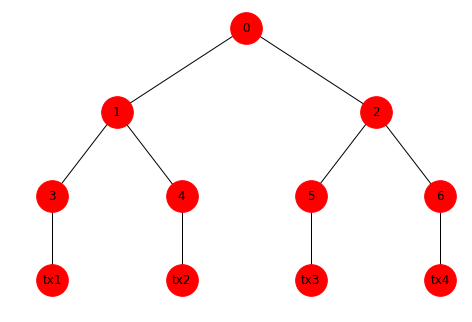

In [99]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    [-2, 3],
    [2, 3],
    [-3, 2],
    [-1, 2],
    [1, 2],
    [3, 2],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1]
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}
nx.draw_networkx_labels(G, positions, labels = labels)

In Bitcoin double sha256 hash scheme is used. Here is an example.

In [100]:
import hashlib, binascii


first_hash = hashlib.sha256(b"hello") # "b" stands for binary representation
second_hash = hashlib.sha256()
print('First hash represented as a hexadecimal number:', first_hash.hexdigest())
second_hash.update(first_hash.digest())
print('Second hash represented as a hexadecimal number:', second_hash.hexdigest())

First hash represented as a hexadecimal number: 2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824
Second hash represented as a hexadecimal number: 9595c9df90075148eb06860365df33584b75bff782a510c6cd4883a419833d50


Now we can easily change vertices' labels to hashes of corresponding messages and plot new graph

856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5


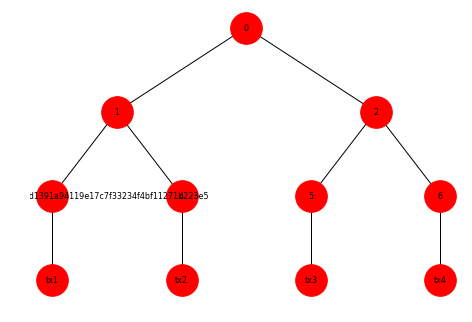

In [101]:
labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)
print(labels[3])

1.Construct Merkle hash tree using previously constructed graph by finding corresponding SHA256 hashes on vertices (2 points). Plot obtained Merkle hash tree (1 point)

{0: Text(0,4,'5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 1: Text(-2,3,'41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 2: Text(2,3,'5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3,2,'856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-1,2,'79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1,2,'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3,2,'4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3,1,'tx1'),
 8: Text(-1,1,'tx2'),
 9: Text(1,1,'tx3'),
 10: Text(3,1,'tx4')}

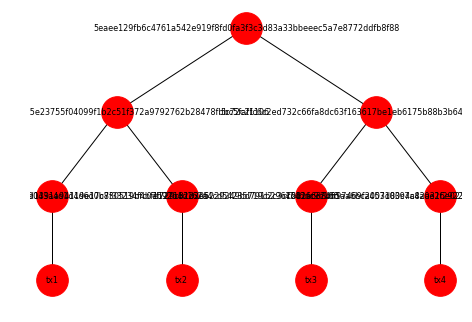

In [102]:
for i in range(3,7):
    labels[i]= hashlib.sha256(hashlib.sha256(labels[i+4].encode('utf-8')).digest()).hexdigest()
labels[1] = hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
labels[2] = hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
labels[0] = hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')).digest()).hexdigest()

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

2.Provide a proof of correctness of leaf tx2 (2 points). 

In [103]:
proof_hash = hashlib.sha256(hashlib.sha256(b"tx2").digest()).hexdigest()
hash1 = hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+proof_hash.encode('utf-8')).digest()).hexdigest()
TopHash = hashlib.sha256(hashlib.sha256(hash1.encode('utf-8')+labels[2].encode('utf-8')).digest()).hexdigest()
if labels[0] == TopHash:
    print(True)
else:
    print(False)

True


3.Provide a proof of correctness for set of leafs (tx3-tx4) (2 points)

In [104]:
proof_hash_3 = hashlib.sha256(hashlib.sha256(b"tx3").digest()).hexdigest()
proof_hash_4 = hashlib.sha256(hashlib.sha256(b"tx4").digest()).hexdigest()

hash2 = hashlib.sha256(hashlib.sha256(proof_hash_3.encode('utf-8')+proof_hash_4.encode('utf-8')).digest()).hexdigest()
TopHash = hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+hash2.encode('utf-8')).digest()).hexdigest()
if labels[0] == TopHash:
    print(True)
else:
    print(False)

True


4.Change the value on leaf tx1 and recompute corresponding hashes. Plot newly obtained Merkle hash tree (2 points)

{0: Text(0,4,'27468c936f057791c2db1b48ee5f5c6c7a8dd6284ebb426590200d9d7098a7bd'),
 1: Text(-2,3,'9ca2a29ac8ab8cd4645cecc6b7b51a2ca3a0078d81b849ae29592a95848612b9'),
 2: Text(2,3,'5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3,2,'712150aa640b7d7ec3336e0054eb3abf0cca6d0d6d4af4e30e2c239eb6bc5468'),
 4: Text(-1,2,'79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1,2,'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3,2,'4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3,1,'tx'),
 8: Text(-1,1,'tx2'),
 9: Text(1,1,'tx3'),
 10: Text(3,1,'tx4')}

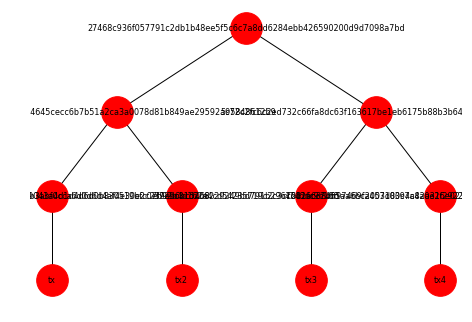

In [105]:
labels[7] = 'tx'
for i in range(3,7):
    #new = 'b'+labels[i+4]
    labels[i]= hashlib.sha256(hashlib.sha256(labels[i+4].encode('utf-8')).digest()).hexdigest()
#lab1 = #binascii.unhexlify(labels[3]+labels[4])
#lab2 = #binascii.unhexlify(labels[5]+labels[6])
labels[1] = hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
labels[2] = hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
#lab0 = binascii.unhexlify(labels[1]+labels[2])
labels[0] = hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')).digest()).hexdigest()
# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

5. Nodes in Merkle hash trees may have arbitrary fanout. In previouse items we consider the case of fanout equals to two. But what will change if we set a fanout equals to three? Construct Merkle hash trees with fanout 3 to sign 9 values? Construct the hash tree with fanout 2 to sign the same set of values? Plot obtained trees (4 points) 

{0: Text(0,4,'0'),
 1: Text(-3,3,'1'),
 2: Text(0,3,'2'),
 3: Text(3,3,'3'),
 4: Text(-4,2,'4'),
 5: Text(-3,2,'5'),
 6: Text(-2,2,'6'),
 7: Text(-1,2,'7'),
 8: Text(0,2,'8'),
 9: Text(1,2,'9'),
 10: Text(2,2,'10'),
 11: Text(3,2,'11'),
 12: Text(4,2,'12'),
 13: Text(-4,1,'tx1'),
 14: Text(-3,1,'tx2'),
 15: Text(-2,1,'tx3'),
 16: Text(-1,1,'tx4'),
 17: Text(0,1,'tx5'),
 18: Text(1,1,'tx6'),
 19: Text(2,1,'tx7'),
 20: Text(3,1,'tx8'),
 21: Text(4,1,'tx9')}

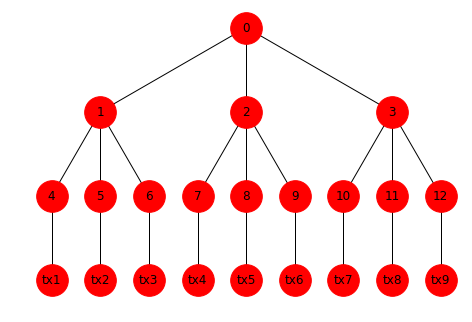

In [106]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    
    [-3, 3],
    [0, 3],
    [3, 3],
    
    [-4, 2],
    [-3, 2],
    [-2, 2],
    
    [-1, 2],
    [0, 2],
    [1, 2],
    
    [2, 2],
    [3, 2],
    [4, 2],
    
    [-4, 1],
    [-3, 1],
    [-2, 1],
    
    [-1, 1],
    [0, 1],
    [1, 1],
    
    [2, 1],
    [3, 1],
    [4, 1]
]
parents = [0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 5, 6,7,8,9,10,11,12]
for index in range(len(parents)):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: 'tx1',
    14: 'tx2',
    15: 'tx3',
    16: 'tx4',
    17: 'tx5',
    18: 'tx6',
    19: 'tx7',
    20: 'tx8',
    21: 'tx9'
}

nx.draw_networkx_labels(G, positions, labels = labels)

{0: Text(0,4,'e7296a950ce7691ac317379ed5ab311cb1cdd4904b59ed20d410bc51b7f69196'),
 1: Text(-3,3,'66ed30b63243fcd5bd1b7414b59e2c2346ea01ca124d58651653ee4e5f47a43b'),
 2: Text(0,3,'c8cfb3fc3818c0aa840299e590ce437472935b00cf9f2b49ea559f7e3f8c012f'),
 3: Text(3,3,'d9dccb4196250a8861ce62b1f8e7e44563c936562337a98cb39d5f69c4696501'),
 4: Text(-4,2,'856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 5: Text(-3,2,'79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 6: Text(-2,2,'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 7: Text(-1,2,'4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 8: Text(0,2,'929e74a52e6f0d8390d60d631d6dc8fb6cde5f10c04c7053bc94ce3f62759823'),
 9: Text(1,2,'ccd702558bb588ba5d49d2ec85af0453fae434476f205ad6caa93da525f86627'),
 10: Text(2,2,'038edc078728e6455aa202890dec7d4635f2180e999f1a7c280c0283e5dc9ccf'),
 11: Text(3,2,'9cb58fa7c7cf21f3e426c113f8f48c115402a476024f21edd7db637f06bb8f76'),
 12: Text

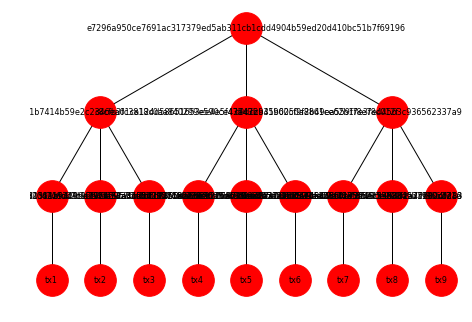

In [107]:
for i in range(4,13):
    labels[i]= hashlib.sha256(hashlib.sha256(labels[i+9].encode('utf-8')).digest()).hexdigest()

    labels[1] = hashlib.sha256(hashlib.sha256(labels[4].encode('utf-8')+labels[5].encode('utf-8')+labels[6].encode('utf-8')).digest()).hexdigest()
labels[2] = hashlib.sha256(hashlib.sha256(labels[7].encode('utf-8')+labels[8].encode('utf-8')+labels[9].encode('utf-8')).digest()).hexdigest()
labels[3] = hashlib.sha256(hashlib.sha256(labels[10].encode('utf-8')+labels[11].encode('utf-8')+labels[12].encode('utf-8')).digest()).hexdigest()

labels[0] = hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')+labels[3].encode('utf-8')).digest()).hexdigest()

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

{0: Text(0,6,'0'),
 1: Text(-1.5,5,'1'),
 2: Text(2.5,5,'2'),
 3: Text(-5.5,4,'3'),
 4: Text(1.5,4,'4'),
 5: Text(3.5,4,'5'),
 6: Text(-7,3,'6'),
 7: Text(-3.5,3,'7'),
 8: Text(0,3,'8'),
 9: Text(3.5,3,'9'),
 10: Text(5,3,'10'),
 11: Text(-8,2,'11'),
 12: Text(-6,2,'12'),
 13: Text(-4.5,2,'13'),
 14: Text(-2.5,2,'14'),
 15: Text(-1,2,'15'),
 16: Text(1,2,'16'),
 17: Text(2.5,2,'17'),
 18: Text(4.5,2,'18'),
 19: Text(6,2,'19'),
 20: Text(-8,1,'tx1'),
 21: Text(-6,1,'tx2'),
 22: Text(-4.5,1,'tx3'),
 23: Text(-2.5,1,'tx4'),
 24: Text(-1,1,'tx5'),
 25: Text(1,1,'tx6'),
 26: Text(2.5,1,'tx7'),
 27: Text(4.5,1,'tx8'),
 28: Text(6,1,'tx9')}

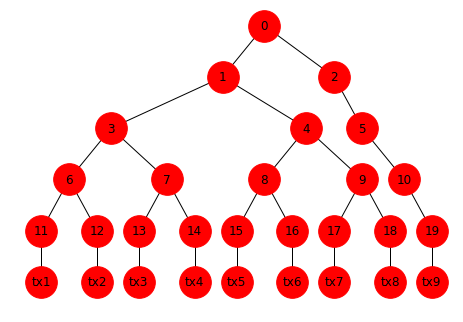

In [108]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 6],
    
    [-1.5, 5],
    [2.5, 5],
    
    [-5.5, 4],
    [1.5, 4],
    [3.5, 4],
    
    [-7, 3],
    [-3.5, 3],
    [0, 3],
    [3.5, 3],
    [5, 3],
    
    [-8, 2],
    [-6, 2],
    [-4.5, 2],
    [-2.5, 2],
    [-1, 2],
    [1, 2],
    [2.5, 2],
    [4.5, 2],
    [6, 2],
    
    [-8, 1],
    [-6, 1],
    [-4.5, 1],
    [-2.5, 1],
    [-1, 1],
    [1, 1],
    [2.5, 1],
    [4.5, 1],
    [6, 1]
]
parents = [0, 0, 0, 1, 1, 2, 3, 3, 4, 4, 5, 6, 6, 7, 7, 8,8,9,9,10,11,12,13,14,15,16,17,18,19]
for index in range(len(parents)):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10',
    11: '11',
    12: '12',
    13: '13',
    14: '14',
    15: '15',
    16: '16',
    17: '17',
    18: '18',
    19: '19',
    20: 'tx1',
    21: 'tx2',
    22: 'tx3',
    23: 'tx4',
    24: 'tx5',
    25: 'tx6',
    26: 'tx7',
    27: 'tx8',
    28: 'tx9'
    
}
nx.draw_networkx_labels(G, positions, labels = labels)

{0: Text(0,6,'014812f0ed0d468e946d9f6aaa90ec39882f71ee199e9d72d4749a7cf0373721'),
 1: Text(-1.5,5,'7ed0ef1f4a0f7e02413d0f19708f9bde561158a5edd44315ea84e0f18ad7bce3'),
 2: Text(2.5,5,'a8b1fcb86f005f2d0316a7874f6afe2101f20970d836aa4658af0dc704abff74'),
 3: Text(-5.5,4,'5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 4: Text(1.5,4,'d39c3a46d7a6dfcf4442264d564bd484d32bc7d4cf4557d66cf23564c20d90e9'),
 5: Text(3.5,4,'1d8161977f9cf815e89165beabb25e9f0e93b9bb5a34524076cbeb391c10ad4d'),
 6: Text(-7,3,'41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 7: Text(-3.5,3,'5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 8: Text(0,3,'d6729da948be8eb1fddfc506ce39885194787a93bef6b3ab9086e1685bddfc2f'),
 9: Text(3.5,3,'ea7690966598257569c816a598a57638cfd7b0b1e43b1bf5d0a62f4de981a7e8'),
 10: Text(5,3,'a77a28c377695015353ef3c3a0efde9d863b3cc6fa71d024e49778564fa58fe1'),
 11: Text(-8,2,'856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e

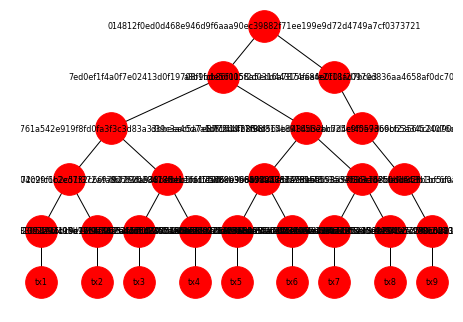

In [109]:
for i in range(11,20):
    labels[i]= hashlib.sha256(hashlib.sha256(labels[i+9].encode('utf-8')).digest()).hexdigest()
labels[6] = hashlib.sha256(hashlib.sha256(labels[11].encode('utf-8')+labels[12].encode('utf-8')).digest()).hexdigest()
labels[7] = hashlib.sha256(hashlib.sha256(labels[13].encode('utf-8')+labels[14].encode('utf-8')).digest()).hexdigest()
labels[8] = hashlib.sha256(hashlib.sha256(labels[15].encode('utf-8')+labels[16].encode('utf-8')).digest()).hexdigest()
labels[9] = hashlib.sha256(hashlib.sha256(labels[17].encode('utf-8')+labels[18].encode('utf-8')).digest()).hexdigest()
labels[10] = hashlib.sha256(hashlib.sha256(labels[19].encode('utf-8')).digest()).hexdigest()

labels[3] = hashlib.sha256(hashlib.sha256(labels[6].encode('utf-8')+labels[7].encode('utf-8')).digest()).hexdigest()
labels[4] = hashlib.sha256(hashlib.sha256(labels[8].encode('utf-8')+labels[9].encode('utf-8')).digest()).hexdigest()
labels[5] = hashlib.sha256(hashlib.sha256(labels[10].encode('utf-8')).digest()).hexdigest()

labels[1] = hashlib.sha256(hashlib.sha256(labels[3].encode('utf-8')+labels[4].encode('utf-8')).digest()).hexdigest()
labels[2] = hashlib.sha256(hashlib.sha256(labels[5].encode('utf-8')).digest()).hexdigest()

labels[0] = hashlib.sha256(hashlib.sha256(labels[1].encode('utf-8')+labels[2].encode('utf-8')).digest()).hexdigest()

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

6.What is the optimum tree fanout for signing first 4 values in the set up of previouse item? (2 points)

**1 idea (preferable)**

We want to optimize proof of correctness of 1 value from other.

As we should use the set up of previouse items for optimal proof of correctness that's why the optimum tree fanout is equal to 9.

Because we shouldn't calculate intermediate stages(like Hash0-0 or Hash0-1 and e.t.c) and we know hashes of every leaf except one which we want to check (it will one hashing value).

*Note*: I assume that the concatenation operation is simpler than hashing

**2 idea**

We know hashes of all 4 values and want to prove of their correctness as 1 block.

In this case, we should use fanout is equal to 4.